In [97]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [98]:
path = os.getcwd() + '\\Analise e Tratamento\\Dados\\'
df = pd.read_csv(path + 'housing.csv', sep =',' , encoding = 'iso-8859-1')
df.head(3)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0


In [99]:
x = df.iloc[:, 1:2].values
y = df.iloc[:, 3].values

In [100]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [101]:
regressao_linear = LinearRegression()
regressao_linear.fit(x_treino, y_treino)

LinearRegression()

In [102]:
#Coeficiente Linear
regressao_linear.intercept_

681977.7451055486

In [103]:
#Coeficiente angular
regressao_linear.coef_

array([-17263.75010515])

In [104]:
#Coeficiente de Determinação dados de treino - r^2(Fala se os dados estão explicando o modelo)
regressao_linear.score(x_treino, y_treino)

0.5688289563355992

In [105]:
#Coeficiente de Determinação dados de teste - r^2
regressao_linear.score(x_teste, y_teste)

0.6006038196307664

In [106]:
previsoes = regressao_linear.predict(x_teste)

In [107]:
#RETA DE REGRESSÃO

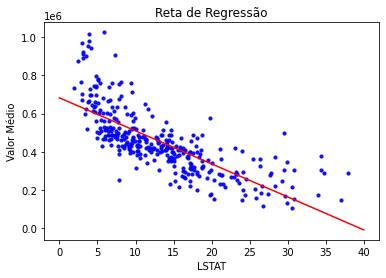

In [108]:
#Comparando a reta com dados de treino
plt.scatter(y = y_treino, x = x_treino, color='blue', s=10, alpha = 0.9)
X_plot = np.linspace(0,40)
plt.plot(X_plot, X_plot*regressao_linear.coef_ + regressao_linear.intercept_, color = 'r')
plt.title('Reta de Regressão')
plt.ylabel('Valor Médio')
plt.xlabel('LSTAT')
plt.show()

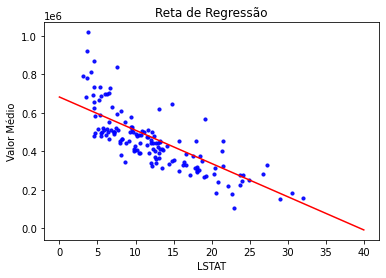

In [109]:
#Comparando a reta com dados de treino
plt.scatter(y = y_teste, x = x_teste, color='blue', s=10, alpha = 0.9)
X_plot = np.linspace(0,40)
plt.plot(X_plot, X_plot*regressao_linear.coef_ + regressao_linear.intercept_, color = 'r')
plt.title('Reta de Regressão')
plt.ylabel('Valor Médio')
plt.xlabel('LSTAT')
plt.show()

In [110]:
#Realizando uma predição
valor_casa = regressao_linear.predict([[25]])
valor_casa

array([250383.99247685])

In [111]:
#MÉTRICAS DE DESEMPENHO

In [112]:
#Erro absoluto médio
abs(y_teste - previsoes).mean()

76340.55192245146

In [113]:
mean_absolute_error(y_teste, previsoes)

76340.55192245146

In [114]:
#Erro quadrático médio
mse = mean_squared_error(y_teste, previsoes)
mse

9863567949.634668

In [115]:
#Raiz do erro quadrático médio
rmse = np.sqrt(mse)
rmse

99315.49702657017

In [116]:
#VALIDAÇÃO CRUZADA

In [117]:
kfold = KFold(n_splits = 15, shuffle = True, random_state = 5)
modelo = LinearRegression()
resultado = cross_val_score(modelo, x, y, cv = kfold)
print('Coeficiente de Determinação Médio - r^2: %.2f%%' % (resultado.mean() * 100))

Coeficiente de Determinação Médio - r^2: 55.97%
